## ***California Housing Prices***
 This is the dataset used in the second chapter of Aurélien Géron's recent book.
 The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data.
# I found this dataset on kaggle.com

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('housing.csv')
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [21]:
print(df.shape)

(20640, 10)


In [22]:
print(df.isna().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


# We have 207 missing (total_bedrooms) values.




In [23]:
mean_total_bedrooms = df['total_bedrooms'].mean()
print(mean_total_bedrooms)
std_total_bedrooms = df['total_bedrooms'].std()
print(std_total_bedrooms)


537.8705525375618
421.3850700740323


After calculating the mean=537.87 and the strandard deviation=421.38 we can see that there is a significant amount of variability in the number of bedrooms in the houses. However we are going to fill the 207 missing values with the mean value since it is representative measure of the central tendency of the data.

In [24]:
df['total_bedrooms'].fillna(mean_total_bedrooms, inplace=True)
print(df.isna().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [25]:
housing_duplicates=df[df.duplicated()]
print('Number of Duplicate:', housing_duplicates.shape)


Number of Duplicate: (0, 10)


# No duplicates

In [26]:
count_near_bay = df['ocean_proximity'].value_counts()['NEAR BAY']
print("Number of NEAR BAY values:", count_near_bay)
count_non_near_bay = len(df) - df['ocean_proximity'].value_counts()['NEAR BAY']
print("Number of non-NEAR BAY values:", count_non_near_bay)



Number of NEAR BAY values: 2290
Number of non-NEAR BAY values: 18350


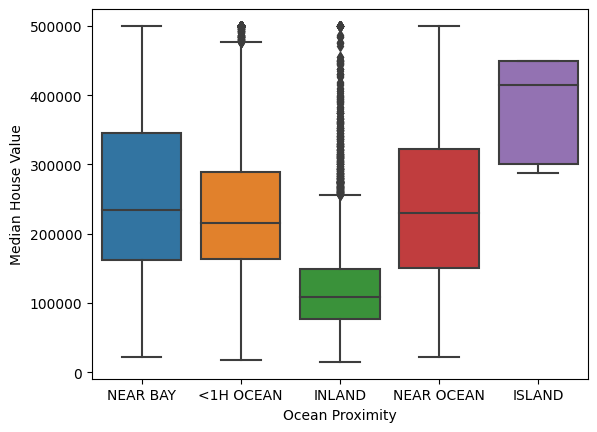

In [27]:
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

We can see that houses that are closer to the ocean generally have a higher median value than houses that are farther away. The plot also shows the NEAR BAY category has a slightly lower median value than the NEAR BAY and 1H OCEAN categories. We have the higher median value in the ISLAND category.

In [28]:
correlation = df['median_house_value'].corr(df['median_income'])
print(f"Correlation coefficient: {correlation:.2f}")


Correlation coefficient: 0.69


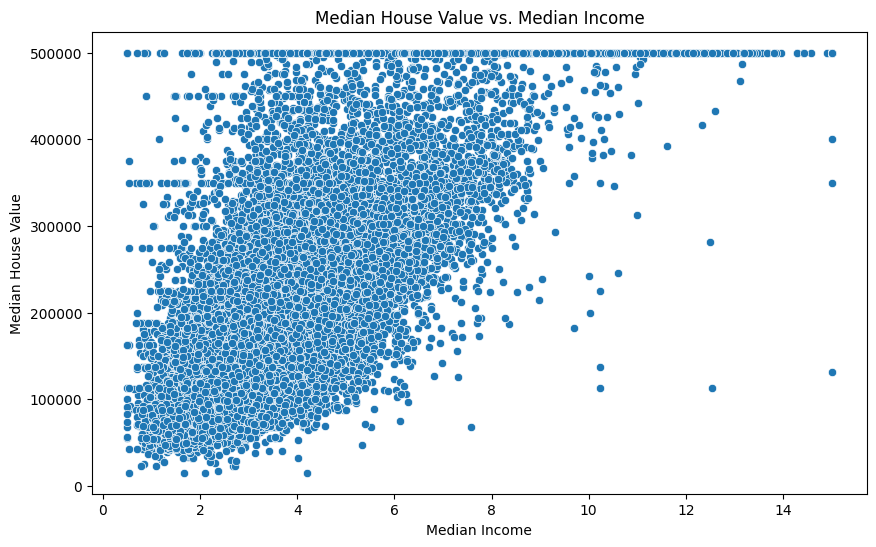

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.title('Median House Value vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()


# And from here we can tell that there is a noticable positive correlation coefficient between Median Income and Median House Value, which means that as median income increases, median house value tends to increase as well.